# Exercise 5 - Solutions

### 1: Review exercises

1.   What are the two interpretations of the coefficients in a multiple linear regression model?
    * for every unit increase in $x_i$, keeping the other covariates constant, the regression function/outcome variable will increase by $\beta_i$
    * $\beta$ can also be interpreted as a partial derivative. $\beta$ can hence be interpreted as the partial rate of increase in the regression function.

    
2.   What is the difference between $\hat{\beta_i}$ and $\beta_i$?
    * $\beta$ are the population coefficients.
    * $\hat{\beta}$ are the estimated regression coefficients
 
 
3.   Why is the quadratic regression $y = \beta_0 + \beta_1x + \beta_2x^2$ considered linear?
    * The quadratic regression model can be interpreted as a multiple linear regression model, where $X_2=X_1^2$.

 
4.   What can you do with `itertools.product` and `zip`?
    * `itertools.product` computes the cartesian product, that is the ordered set of all possible combinations of two sets.
    * `zip` creates an iterator from multiple iterables. Given e.g. two lists of equal lengths, `zip` will combine them into a single object that can itself be iterated over. 
 
    
5.   Given a datafram `df`, how do you make a bunch of scatterplots for all the
     variables in `df`?
    * For example with `seaborn.pairplot()`.


6.   What do you call the geometric shape defined by $z = a + bx + cy$?
    * A plane. 

### 2: Using tools from python
#### a) `zip`:

In [1]:
def my_zip(iterable_1, iterable_2):
    """
    This function is a simple version of python's `zip` for exemplary purposes.
    
    Parameters
    ----------
        iterable_1 : iterable
            The first element to be zipped. Can be any tuple, list, np.array etc.
        iterable_2 : iterable
            The second element to be zipped. Can be any tuple, list, np.array etc.
            
    Retruns
    -------
        zipped : list 
            Returns a list of tuples. Contains the zipped inputs.
    """

    # check if inputs have the same length
    if len(iterable_1)==len(iterable_2):
        
        # initialize output
        zipped = []
        
        # loop over elements
        for i in range(len(iterable_1)):
            # collect index i elements of inputs in tuples and append to "zipped"
            zipped.append((iterable_1[i],iterable_2[i]))
    else:
        # raise and error, if the input arguments have different size
        raise AttributeError('input arguments must have the same length!')
        
    # return zipped
    return zipped

Let's test our function on a simple example:

In [2]:
# generate two arbitrary lists
A = [1,2,3]
B = [6,4,5]

# call function
my_zip(A,B)


[(1, 6), (2, 4), (3, 5)]

In [3]:
# generate two arbitrary lists
A = [1,2,3]
B = [6,4,5,6]

# call function
my_zip(A,B)

AttributeError: input arguments must have the same length!

Our function and custom error message seem to work as intended. 

#### b) `enumerate`:

In [5]:
def my_enumerate(iterable):
    """
    This function is a simple version of python's `enumerate` for examplary purposes.
    Note that I first use `len` to get the number of elements in "iterable". I then use 
    `range` to create the indexes of "iterable". Finally, I simply zip them together using 
    `zip`.
    
    Parameters
    ----------
        iterable : iterable
            An iterable to be enumerated
            
    Returns
    -------
        the enumerated input.
    
    """
    
    # return the enumerated input
    return zip(range(len(A)),A)

Let's again test our function:

In [6]:
list(enumerate(A))

[(0, 1), (1, 2), (2, 3)]

#### c) The `product`function: 

In [7]:
def my_product(list_1, list_2):
    """
    This function is a simple version of python's `itertools.product` for exemplary 
    purposes.
    
    Parameters
    ----------
        list_1 : iterable
            The first set to for computing the cartesian product.
        list_1 : iterable
            The second set for computing the cartesian product.
            
    Retruns
    -------
        product_list : list 
            Returns a list of the set of all ordered pairs(list_1,list_2).
    """
    
    # fill in
    product_list = []
    
    # loop over elements in 1st iterable
    for i in list_1:
        # loop over elements on 2nd iterable
        for j in list_2:
            # append product_list with ordered pairs
            product_list.append((i,j))
    
    # return product_list
    return product_list
      

Let's again test our function:

In [8]:
# generate two arbitrary lists
A = [1,2,3]
B = [6,4,5]

my_product(A,B)

[(1, 6), (1, 4), (1, 5), (2, 6), (2, 4), (2, 5), (3, 6), (3, 4), (3, 5)]

#### d) The `yield` keyword & generators:
##### (i) Another generator

In [9]:
def my_range(f,n):
    """
    This function creates a flexible generator object. The function f
    is applied in sequence to the values of range(n)
    
    Parameters
    ----------
        f : function
            The function applied in sequence to the values of range(n)
        n : int
            The maximum length.
    
    Returns
    -------
        A generator object defined by f and n.
    """
    
    # set running index to 0
    i = 0
    
    # iterate while i is smaller than n
    while i < n:
        # yield function f applied to i
        yield f(i)
        
        # update the running index
        i += 1
 

Let's test the function:

In [10]:
# return a simple increasing sequence
list(my_range(lambda x : x,3))


[0, 1, 2]

In [11]:
# return a simple increasing sequence of squares
list(my_range(lambda x : x**2,3))

[0, 1, 4]

##### (i) Infinite generators

In [12]:
def my_range_inf():
    """
    This function creates an infinite generator object. 
    
    Returns
    -------
        infinite generator object.
    """
    
    # set running index to 0
    i = 0
    
    # iterate while i is smaller than infinity
    while i < float('inf'):
        # yield function f applied to i
        yield i
        
        # update the running index
        i += 1
       

Let's see what happens when we call it.

In [13]:
my_range_inf()

<generator object my_range_inf at 0x000001F5B3E429E0>

Indeed, the function does not run infinitely. This is, because of the unique features of generator objects. The function returns a generator object in its current state, but does not execute the function further. 

Let's try the other example:

In [14]:
list(zip([1,2,3], my_range_inf()))

[(1, 0), (2, 1), (3, 2)]

Now the function is executed 3 times, the state of the generator is zipped together with the list elements and the results also returned as a list. Importantly, the number of executions is determined by the length of the list. 

### 3: Multiple linear regression

#### a)  Import and visualize data:

In [15]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# download the data
admissions = pd.read_csv('binary.csv')
admissions.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


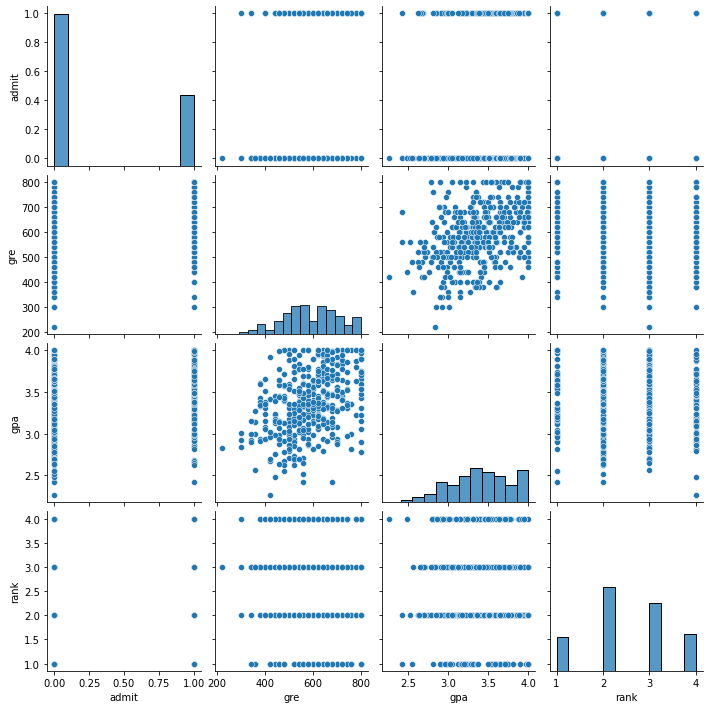

In [16]:
# plot the data
sns.pairplot(admissions)
plt.show()

Let's mention a couple of data features:
   * "admit" is a binary variable.
   * "gre" is bounded from above at 800.
   * "gpa" is bouded from above at 4.
   * "rank" is a categorical variable.
   * "gre" and "gpa" are positively correlated.
   

#### b) Predict the GRE score

In [17]:
# import the statsmodels api
import statsmodels.formula.api as smf

Run the multiple linear regression.

In [18]:
# run the regression
fit = smf.ols("gre ~ admit + gpa + rank", data = admissions).fit()
fit.summary() # summary() is a method that presents a lot of info!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     26.52
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.19e-15
Time:                        12:05:05   Log-Likelihood:                -2430.2
No. Observations:                 400   AIC:                             4868.
Df Residuals:                     396   BIC:                             4884.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    231.2565     50.333      4.595      0.000     132.304     330.209
admit         25.0337     11.887      2.106      0.036       1.664      48.403
gpa          109.8122     14.147      7.762      0.000      81.999     137.625
rank          -9.5602      5.782     -1.653      0.099     -20.927       1.807
==============================================================================
Omnibus:                        2.041   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.814
Skew:                          -0.056   Prob(JB):                        0.404
Kurtosis:                       2.690   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

"gpa" seems to be the most important predictor. This makes sense in light of our examination from above. "gpa" and "gre" are strongly positively correlated. 

In [19]:
fit = smf.ols("gre ~ admit ", data = admissions).fit()
fit.rsquared

0.03401600256131887

In [20]:
fit = smf.ols("gre ~ gpa", data = admissions).fit()
fit.rsquared 

0.14766026501113427

In [21]:
fit = smf.ols("gre ~ rank", data = admissions).fit()
fit.rsquared 

0.01523917984961587

Compared to the univariate regressions, the $R^2$ is higher. Think about why this makes sense! 

#### c) Two dimensional models

In [22]:
# fit the model
fit = smf.ols("gre ~ admit + gpa", data = admissions).fit()

Plot the plane and a scatter plot of the data.

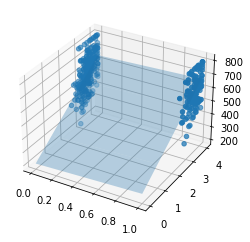

In [23]:
import numpy as np

fig = plt.figure()

# add axes
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(2), range(5))

zz = fit.params[0] + fit.params[1] * xx + fit.params[2] * yy

# plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.3)
ax.scatter(admissions["admit"], admissions["gpa"], admissions["gre"]);
plt.show()

Residual plot:

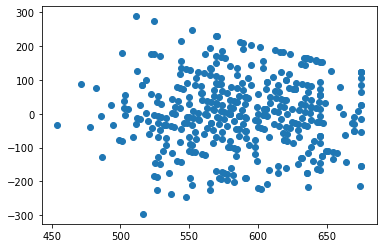

In [24]:
plt.scatter(fit.fittedvalues, fit.resid)

#### d) Transformations

In [25]:
# fit the model
fit = smf.ols("gre ~ admit + np.log(gpa)", data = admissions).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     37.72
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.01e-15
Time:                        12:05:06   Log-Likelihood:                -2432.0
No. Observations:                 400   AIC:                             4870.
Df Residuals:                     397   BIC:                             4882.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     139.3867     56.670      2.460      0.014      27.977     250.797
admit          30.1069     11.581      2.600      0.010       7.339      52.875
np.log(gpa)   361.3194     46.897      7.705      0.000     269.122     453.516
==============================================================================
Omnibus:                        1.740   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.639
Skew:                          -0.068   Prob(JB):                        0.441
Kurtosis:                       2.717   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# fit the model
fit = smf.ols("gre ~ admit + gpa**2", data = admissions).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     38.25
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           6.47e-16
Time:                        12:05:06   Log-Likelihood:                -2431.6
No. Observations:                 400   AIC:                             4869.
Df Residuals:                     397   BIC:                             4881.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    204.8408     47.834      4.282      0.000     110.801     298.881
admit         29.6809     11.575      2.564      0.011       6.925      52.437
gpa          110.1612     14.176      7.771      0.000      82.291     138.031
==============================================================================
Omnibus:                        1.662   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.572
Skew:                          -0.063   Prob(JB):                        0.456
Kurtosis:                       2.720   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In terms of $R^2$, the model without transformations still performs the best. 

### 4: Quadratic regression
#### a ) 

In [27]:
# load the data
df = pd.read_csv('bullshit.csv')
df = df.set_index('Unnamed: 0')
df.head()

,free_market_ideology,bullshit_receptivity
Unnamed: 0,,
1,40.0,3.100000
2,30.0,2.666667
3,70.0,3.300000
4,10.0,1.900000
5,50.0,3.566667


#### b) 

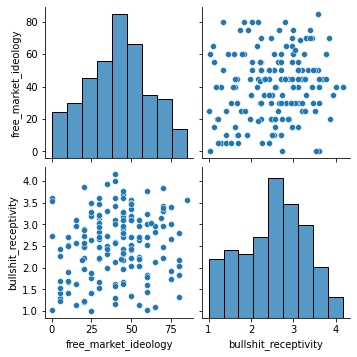

In [28]:
# plot the data
sns.pairplot(df)
plt.show()

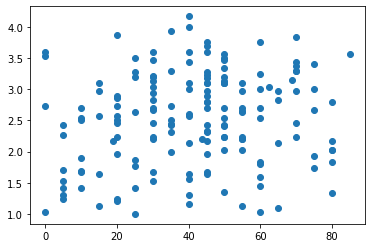

In [29]:
plt.scatter(df.free_market_ideology, df.bullshit_receptivity)
plt.show()

#### c) 

It does not seem that there is a U-shape. 